#**Day 1 with Python** 
Multiple Linear Regression

No handles with labels found to put in legend.


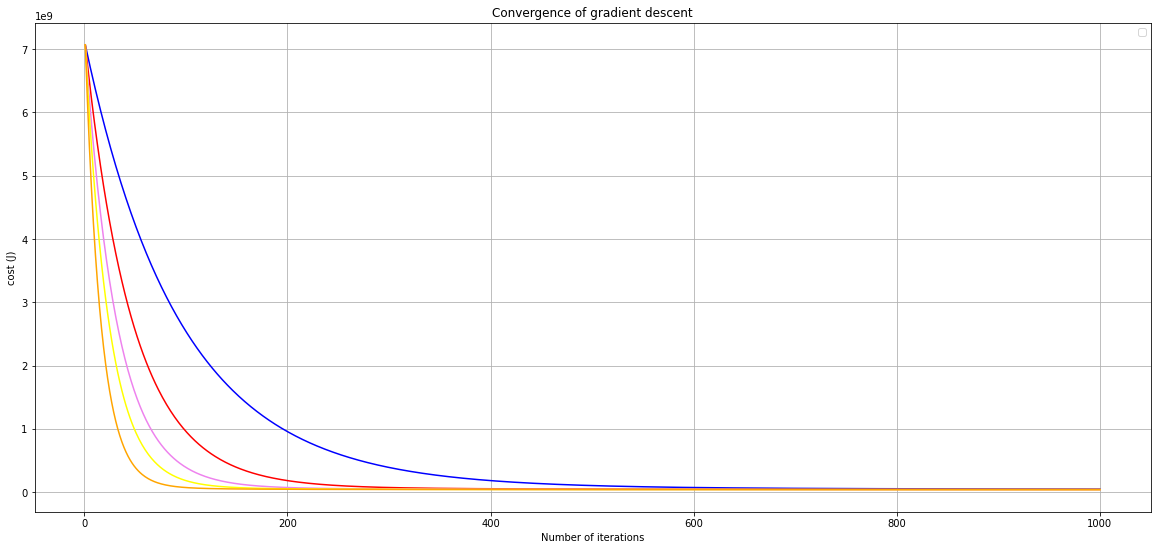

In [85]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

# Tạo đường dẫn cho file data csv
data = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Day1/50_Startups.csv')

# Chuyển đổi State thành các số nguyên 0 1 2 tương ứng:
data['State'].replace(['New York', 'California', 'Florida'],[0,1,2],inplace=True)

"""Hàm chuẩn hóa vì Trong thuật toán giảm dần độ dốc, chúng tôi tính toán chi phí cho mỗi bước. 
Và nếu các giá trị đầu vào của chúng ta khác nhau theo thứ tự độ lớn thì 
kết quả sau mỗi bước giảm độ dốc cũng sẽ khác nhau rất nhiều."""
def feature_normalize(X):
  mu = np.mean(X, axis = 0)  
  sigma = np.std(X, axis= 0, ddof = 1)
  X_norm = (X - mu)/sigma
  return X_norm, mu, sigma

# Hàm gradient descent để tính các giá trị theta:
"""
- numpy.dot () hàm này trả về tích số chấm của hai mảng. 
Đối với mảng 2 chiều, nó tương đương với phép nhân ma trận
"""
def gradientDescent(X, y, theta, alpha, iterations, cost_history):
  for i in range(iterations):
    predictions = np.dot(X, theta)
    loss = predictions - y
    cost = np.sum(loss ** 2) / (2 * m)
    cost_history.append(cost)
    gradient = np.dot(X.T, loss) / m
    theta = theta - alpha * gradient
  return theta

# Lấy dữ liệu X từ data gồm các cột sau:
X = data[['R&D Spend', 'Administration','State', 'Marketing Spend']]

# chuẩn hóa X
X, mu, sigma = feature_normalize(X)

# Lấy dữ liệu Y từ data:
y = data['Profit']

# New range or standard deviation of normalized X feature is 1
one = np.ones((len(X),1))
X = np.append(one,X,1)

# alpha : Learning rate
alpha = 0.005

# iterations: Number of iterations 
iterations = 1000

# m, n là kích thước của X
m, n = np.shape(X)

# theta là 1D array of fitting parameters or weights
theta = np.zeros(n)
cost_history= []
theta = gradientDescent(X, y, theta, alpha, iterations, cost_history)

# Miêu tả sự phụ thuộc của learning rate
theta_1 = np.zeros(n)
alpha_1 = 0.01
cost_history_1= []
theta_1 = gradientDescent(X, y, theta_1, alpha_1, iterations, cost_history_1)

theta_2 = np.zeros(n)
alpha_2 = 0.015
cost_history_2= []
theta_2 = gradientDescent(X, y, theta_2, alpha_2, iterations, cost_history_2)

theta_3 = np.zeros(n)
alpha_3 = 0.02
cost_history_3= []
theta_3 = gradientDescent(X, y, theta_3, alpha_3, iterations, cost_history_3)

theta_4 = np.zeros(n)
alpha_4 = 0.03
cost_history_4= []
theta_4 = gradientDescent(X, y, theta_4, alpha_4, iterations, cost_history_4)

# Vẽ sự phụ thuộc của cost vào iteration
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.plot(range(1, iterations +1), cost_history_1, color ='red')
plt.plot(range(1, iterations +1), cost_history_2, color ='violet')
plt.plot(range(1, iterations +1), cost_history_3, color ='yellow')
plt.plot(range(1, iterations +1), cost_history_4, color ='orange')
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")
plt.legend()